# 实验15数据分析与可视化综合实验

# 实验目的
1. 熟悉Python标准库csv的用法。
2. 熟悉csv和txt文件操作。
3. 熟悉安装扩展库mumpy、pandas、matplotib.
4. 熟悉使用扩展库pandas进行数据分析的基本操作。
5. 熟悉使用扩展库matplotlib进行数据可视化的基本操作。

# 实验目内容

# 1. 运行下面程序，当前文件夹中生成饭店营业额模拟数据文件data.csv.

In [7]:
import csv
import random
import datetime

In [8]:
fn = 'data.csv'

In [9]:
with open(fn,'w') as fp:
    #创建csv文件并写入对象
    wr = csv.writer(fp,lineterminator='\n')
    #写入表头
    wr.writerow(['日期','销量'])
    #生成模拟数据
    starDate =datetime.date(2017,1,1)
    #生成365个模拟数据，可以根据需要进行整理
    for i in range(365):
        #生成一个模拟数据，写入csv
        amount =300+i*5+random.randrange(100)
        wr.writerow([str(starDate),amount])
        #下一天
        starDate =starDate+datetime.timedelta(days=1)

# 2.然后完成下面的任务：
1. 使用 pandas读取文件data,csv中的数据,创建 Dataframe对象,并删除其中所有
缺失值。
2. 使用 matplotlib生成折线图,反映该饭店每天的营业额情况,并把图形保存为本
地文件frst.jpg。
3. 按月份进行统计,使用 matplotlib绘制柱状图显示每个月份的营业额,并把图形
保存为本地文件 second.jpg。
4. 按月份进行统计,找出相邻两个月最大涨幅,并把涨幅最大的月份写入文件。
5. 按季度统计该饭店2017年的营业额数据,使用 matplotlib生成饼状图显示201
年4个季度的营业额分布情况,并把图形保存为本地文件 third.jpg。

# 实验代码

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
#读取数据，丢弃缺失值
df =pd.read_csv('data.csv',encoding='cp936')
df = df.dropna()

<Figure size 432x288 with 0 Axes>

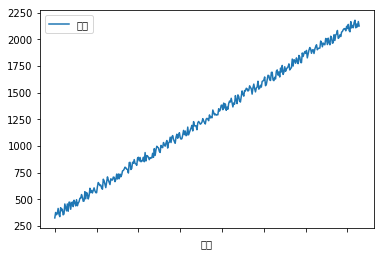

In [13]:
#生成营业额折线图
plt.figure()
df.plot(x= '日期')
plt.savefig('first.jpg')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

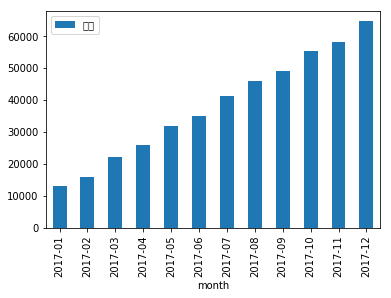

In [21]:
#按月统计，生成柱状图
plt.figure()
df1=df[:]
df1['month']=df1['日期'].map(lambda x:x[:x.rindex('-')])
df1=df1.groupby(by='month',as_index=False).sum()
df1.plot(x='month',kind='bar')
plt.savefig('second.jpg')

In [22]:
#查找涨幅最大的月份，写入文件
df2 =df1.drop('month',axis=1).diff()
m =df2['销量'].nlargest(1).keys()[0]
with open('maxMonth.txt','w')as fp:
    fp.write(df1.loc[m,'month'])

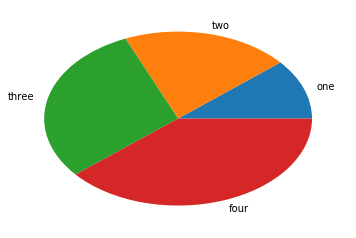

In [24]:
plt.figure()
one =df1[:3]['销量'].sum()
two =df1[3:6]['销量'].sum()
three =df1[6:9]['销量'].sum()
four =df1[9:12]['销量'].sum()
plt.pie([one,two,three,four],
       labels=['one','two','three','four'])
plt.savefig('third.jpg')